In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates

In [2]:
df = pd.read_csv('hmmm.csv')

In [3]:
df.head()

,Unnamed: 0,arrival_hydrophone,init_arrival_time,id,depth,aic_t,first_hydrophone,second_hydrophone,arrival_time
0,0,h3,18037.318174,0,348.5,"[18037.31817321759, 18037.3181718287, 18037.31...",5,4,18037.318172
1,1,h3,18037.318189,1,275.0,"[18037.318188935187, 18037.318188599536, 18037...",4,5,18037.318188
2,2,h3,18037.318203,2,275.0,"[18037.31820296296, 18037.318202974537, 18037....",4,5,18037.318201
3,3,h3,18037.318219,3,275.0,"[18037.3182190625, 18037.31821888889, 18037.31...",4,5,18037.318217
4,4,h3,18037.318222,4,275.0,"[18037.31822136574, 18037.318221331017, 18037....",4,5,18037.318221


In [4]:
df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)

In [5]:
df.depth.dropna()

0       348.500
1       275.000
2       275.000
3       275.000
4       275.000
         ...   
2236    242.625
2237    240.875
2238    242.625
2239    239.125
2240    243.500
Name: depth, Length: 2241, dtype: float64

(400.0, 50.0)

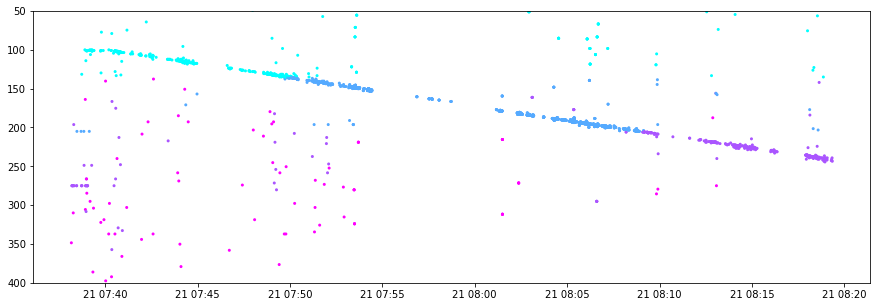

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap='cool')

ax.set_ylim(400, 50)